In [1]:
#Installing torch with cuda (gpu) support

In [25]:
# !pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu130 -> Pytorch version for CUDA on nvidia 

In [1]:
# !pip uninstall torch

In [61]:
# !pip install onnx onnxruntime onnxscript

## Cassava Disease Detection Using DL/ML

In [28]:
import os
from PIL import Image
import numpy as np

from matplotlib import pyplot as plt

### Classes in the Dataset

We can figure out the classes in the dataset.

In [29]:
data_path = "data/train"

In [30]:
# Dataset classes
os.listdir(data_path)

['cgm', 'cmd', '.DS_Store', 'healthy', 'cbb', 'cbsd']

#### Observation
These classes map to:

1. Cassava Bacterial Blight (CBB),
2. Cassava Brown Steak Disease (CBSD),
3. Cassava Green Mite (CGM),
4. Cassava Mosaic Disease (CMD) and
5. Healthy.

### Checking Class Distribution (i.e., Label Imbalance)

In [31]:
# Class paths
data_paths = [(p, os.path.join(data_path, p)) for p in os.listdir(data_path)]

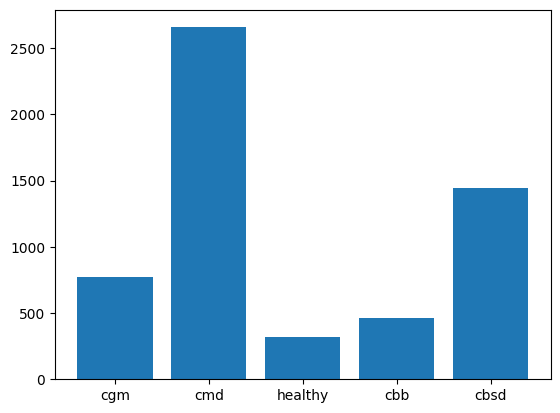

In [32]:
# Class distribution
count_dict = {
    a: len(os.listdir(b))
    for a, b in data_paths
    if os.path.isdir(b)
}

plt.bar(x = count_dict.keys(), height = count_dict.values())

plt.show(); plt.close("all")

### Image Sizes

In addition, we can explore the sizes of the images.

In [33]:
data_paths

[('cgm', 'data/train/cgm'),
 ('cmd', 'data/train/cmd'),
 ('.DS_Store', 'data/train/.DS_Store'),
 ('healthy', 'data/train/healthy'),
 ('cbb', 'data/train/cbb'),
 ('cbsd', 'data/train/cbsd')]

In [34]:
data_paths = [p for p in data_paths if p[0] != '.DS_Store'] #Remove .DS_Store since it isnt a folder

In [35]:
data_paths

[('cgm', 'data/train/cgm'),
 ('cmd', 'data/train/cmd'),
 ('healthy', 'data/train/healthy'),
 ('cbb', 'data/train/cbb'),
 ('cbsd', 'data/train/cbsd')]

In [36]:
sample_files = os.listdir(data_paths[0][-1])

In [37]:
sample_files[:10]

['train-cgm-738.jpg',
 'train-cgm-704.jpg',
 'train-cgm-710.jpg',
 'train-cgm-248.jpg',
 'train-cgm-260.jpg',
 'train-cgm-506.jpg',
 'train-cgm-512.jpg',
 'train-cgm-274.jpg',
 'train-cgm-328.jpg',
 'train-cgm-314.jpg']

In [38]:
sample_paths = [
    os.path.join(data_paths[0][-1], f)
    for f in sample_files
]

In [39]:
sample_paths[:10]

['data/train/cgm/train-cgm-738.jpg',
 'data/train/cgm/train-cgm-704.jpg',
 'data/train/cgm/train-cgm-710.jpg',
 'data/train/cgm/train-cgm-248.jpg',
 'data/train/cgm/train-cgm-260.jpg',
 'data/train/cgm/train-cgm-506.jpg',
 'data/train/cgm/train-cgm-512.jpg',
 'data/train/cgm/train-cgm-274.jpg',
 'data/train/cgm/train-cgm-328.jpg',
 'data/train/cgm/train-cgm-314.jpg']

In [40]:
image_sizes = []

for f in sample_paths:
    img = np.array(Image.open(f)).astype(int)
    image_sizes.append(img.shape) #img.size also

In [41]:
set(image_sizes)

{(500, 456, 3),
 (500, 499, 3),
 (500, 500, 3),
 (500, 501, 3),
 (500, 504, 3),
 (500, 506, 3),
 (500, 511, 3),
 (500, 514, 3),
 (500, 517, 3),
 (500, 521, 3),
 (500, 523, 3),
 (500, 525, 3),
 (500, 528, 3),
 (500, 529, 3),
 (500, 532, 3),
 (500, 537, 3),
 (500, 538, 3),
 (500, 543, 3),
 (500, 545, 3),
 (500, 546, 3),
 (500, 547, 3),
 (500, 549, 3),
 (500, 551, 3),
 (500, 552, 3),
 (500, 555, 3),
 (500, 556, 3),
 (500, 557, 3),
 (500, 563, 3),
 (500, 564, 3),
 (500, 565, 3),
 (500, 566, 3),
 (500, 570, 3),
 (500, 572, 3),
 (500, 573, 3),
 (500, 574, 3),
 (500, 576, 3),
 (500, 578, 3),
 (500, 580, 3),
 (500, 587, 3),
 (500, 592, 3),
 (500, 594, 3),
 (500, 598, 3),
 (500, 600, 3),
 (500, 601, 3),
 (500, 603, 3),
 (500, 605, 3),
 (500, 608, 3),
 (500, 609, 3),
 (500, 610, 3),
 (500, 614, 3),
 (500, 615, 3),
 (500, 616, 3),
 (500, 617, 3),
 (500, 618, 3),
 (500, 619, 3),
 (500, 620, 3),
 (500, 622, 3),
 (500, 623, 3),
 (500, 625, 3),
 (500, 626, 3),
 (500, 628, 3),
 (500, 633, 3),
 (500, 6

In [42]:
sample_files = [os.listdir(p[-1])[:4] for p in data_paths if os.path.isdir(p[-1])]

In [43]:
sample_files

[['train-cgm-738.jpg',
  'train-cgm-704.jpg',
  'train-cgm-710.jpg',
  'train-cgm-248.jpg'],
 ['train-cmd-1992.jpg',
  'train-cmd-2243.jpg',
  'train-cmd-2525.jpg',
  'train-cmd-1038.jpg'],
 ['train-healthy-191.jpg',
  'train-healthy-185.jpg',
  'train-healthy-152.jpg',
  'train-healthy-146.jpg'],
 ['train-cbb-166.jpg',
  'train-cbb-172.jpg',
  'train-cbb-199.jpg',
  'train-cbb-358.jpg'],
 ['train-cbsd-913.jpg',
  'train-cbsd-907.jpg',
  'train-cbsd-708.jpg',
  'train-cbsd-734.jpg']]

In [44]:
data_paths

[('cgm', 'data/train/cgm'),
 ('cmd', 'data/train/cmd'),
 ('healthy', 'data/train/healthy'),
 ('cbb', 'data/train/cbb'),
 ('cbsd', 'data/train/cbsd')]

In [45]:
sample_paths = list(map(lambda x, y: {x[0]: [os.path.join(x[1], y_) for y_ in y]}, data_paths, sample_files))

In [46]:
sample_paths

[{'cgm': ['data/train/cgm/train-cgm-738.jpg',
   'data/train/cgm/train-cgm-704.jpg',
   'data/train/cgm/train-cgm-710.jpg',
   'data/train/cgm/train-cgm-248.jpg']},
 {'cmd': ['data/train/cmd/train-cmd-1992.jpg',
   'data/train/cmd/train-cmd-2243.jpg',
   'data/train/cmd/train-cmd-2525.jpg',
   'data/train/cmd/train-cmd-1038.jpg']},
 {'healthy': ['data/train/healthy/train-healthy-191.jpg',
   'data/train/healthy/train-healthy-185.jpg',
   'data/train/healthy/train-healthy-152.jpg',
   'data/train/healthy/train-healthy-146.jpg']},
 {'cbb': ['data/train/cbb/train-cbb-166.jpg',
   'data/train/cbb/train-cbb-172.jpg',
   'data/train/cbb/train-cbb-199.jpg',
   'data/train/cbb/train-cbb-358.jpg']},
 {'cbsd': ['data/train/cbsd/train-cbsd-913.jpg',
   'data/train/cbsd/train-cbsd-907.jpg',
   'data/train/cbsd/train-cbsd-708.jpg',
   'data/train/cbsd/train-cbsd-734.jpg']}]

In [47]:
samples = dict()

for (x, y), f in zip(data_paths, sample_files):
    samples[x] = [os.path.join(y, y_) for y_ in f]

In [48]:
samples

{'cgm': ['data/train/cgm/train-cgm-738.jpg',
  'data/train/cgm/train-cgm-704.jpg',
  'data/train/cgm/train-cgm-710.jpg',
  'data/train/cgm/train-cgm-248.jpg'],
 'cmd': ['data/train/cmd/train-cmd-1992.jpg',
  'data/train/cmd/train-cmd-2243.jpg',
  'data/train/cmd/train-cmd-2525.jpg',
  'data/train/cmd/train-cmd-1038.jpg'],
 'healthy': ['data/train/healthy/train-healthy-191.jpg',
  'data/train/healthy/train-healthy-185.jpg',
  'data/train/healthy/train-healthy-152.jpg',
  'data/train/healthy/train-healthy-146.jpg'],
 'cbb': ['data/train/cbb/train-cbb-166.jpg',
  'data/train/cbb/train-cbb-172.jpg',
  'data/train/cbb/train-cbb-199.jpg',
  'data/train/cbb/train-cbb-358.jpg'],
 'cbsd': ['data/train/cbsd/train-cbsd-913.jpg',
  'data/train/cbsd/train-cbsd-907.jpg',
  'data/train/cbsd/train-cbsd-708.jpg',
  'data/train/cbsd/train-cbsd-734.jpg']}

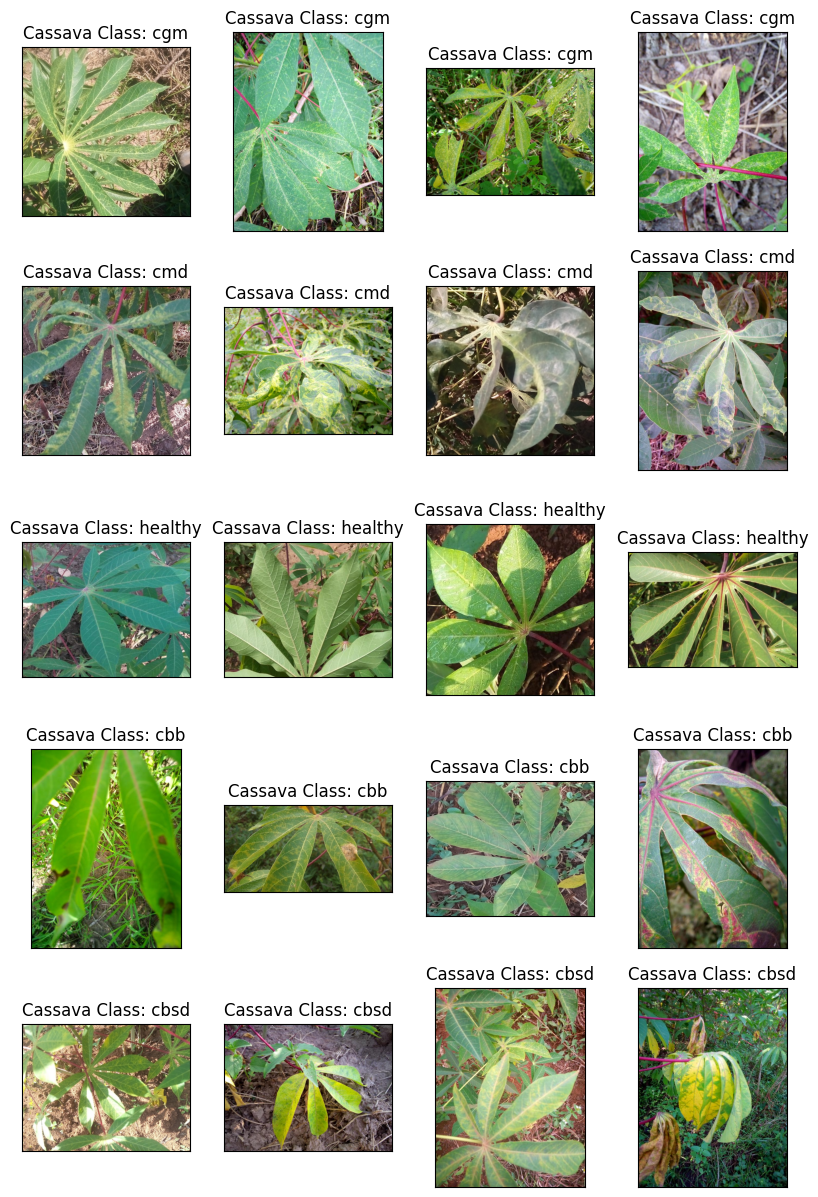

In [49]:
fig, axs = plt.subplots(len(samples), 4, figsize = (10, 15))
i = 0
j = 0

for class_, imgs in samples.items():
    for img in imgs:
        img = Image.open(img)
        axs[i, j].imshow(img)
        axs[i, j].set_title("Cassava Class: " + class_)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        
        j+=1
    
    j = 0
    i += 1

plt.show(); plt.close("all")

### Let's Prepare our Data

In [50]:
from random import shuffle

import torch

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms as T

In [52]:
torch.cuda.is_available()

In [27]:
# Set computational device as either CPU or GPU (i.e., CUDA)
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [28]:
DEVICE

device(type='cuda')

In [29]:
class CassavaDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        if transform is not None:
            self.transform = transform
        else:
            self.transform = T.Compose(
                [
                    T.Resize((224, 224)), # Resize images
                    T.ToTensor(), # Convert images to PyTorch tensors
                    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # Normalize images (Values used for imagenet)
                ]
            )
        classes = os.listdir(path)
        classes = [c for c in classes if c != '.DS_Store'] #Remove .DS_Store since it isnt a folder
        print(classes)
        self.class_map = dict(zip(classes, [_ for _ in range(len(classes))]))
        self.files = []

        for class_ in classes:
            self.files +=[(os.path.join(path, class_, f), class_) for f in os.listdir(os.path.join(path, class_))]

        shuffle(self.files)

    def __len__(self):
        return len(self.files)

    def __getitem__(self, ix):
        file = self.files[ix]
        image = Image.open(file[0])

        return self.transform(image), self.class_map[file[-1]]

In [30]:
# Instantiae Dataset object
dataset = CassavaDataset(path = "data/train")

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']


In [31]:
dataset.files[:10]

[('data/train\\cbsd\\train-cbsd-1061.jpg', 'cbsd'),
 ('data/train\\cmd\\train-cmd-578.jpg', 'cmd'),
 ('data/train\\healthy\\train-healthy-192.jpg', 'healthy'),
 ('data/train\\cmd\\train-cmd-434.jpg', 'cmd'),
 ('data/train\\cmd\\train-cmd-1329.jpg', 'cmd'),
 ('data/train\\cbsd\\train-cbsd-38.jpg', 'cbsd'),
 ('data/train\\cbsd\\train-cbsd-1147.jpg', 'cbsd'),
 ('data/train\\cmd\\train-cmd-808.jpg', 'cmd'),
 ('data/train\\cmd\\train-cmd-2098.jpg', 'cmd'),
 ('data/train\\cbsd\\train-cbsd-811.jpg', 'cbsd')]

In [32]:
# Number of samples in Dataset
num_samples = len(dataset)

In [33]:
print(num_samples)

5656


In [34]:
# Set test size
test_size = int(num_samples * .30)

In [35]:
# Split dataset into train and test splits
train_ds, test_ds = random_split(dataset = dataset, lengths = [.7, .3])

In [36]:
len(train_ds)

3960

In [37]:
len(test_ds)

1696

In [38]:
BATCH_SIZE = 16

In [39]:
# Generate DataLoaders for faster training in batches...
train_dl, test_dl = (
    DataLoader(dataset = train_ds, batch_size = BATCH_SIZE, shuffle = True),
    DataLoader(dataset = test_ds, batch_size = BATCH_SIZE, shuffle = True)
)

<div><h3>04. Data Modelling</h3></div>

- We will use pretrained models, reconfigure pretrained models Resnet-18 and VGG-13.
- Then we initialize model weights.
- Instantiate training utilities.
- Write training loop.
- Finetune and Train model.

In [40]:
from torchvision.models import resnet18, vgg16, vgg13
from sklearn.metrics import accuracy_score

In [41]:
def generate_model(out_features, freeze_weights = True, model_function = resnet18):
    base_model = model_function(weights = True)

    if freeze_weights:
        for param in base_model.parameters():
            param.requires_grad_(False)

    # Try to tweak base model to what we want (out_features)
    try:
        # For resnet model
        in_features = base_model.fc.in_features
        new_layer = nn.Linear(in_features, out_features)
        base_model.fc = new_layer
    except:
        # For vgg-13 model
        in_features = base_model.classifier[0].in_features
        new_layer = nn.Linear(in_features, out_features)
        base_model.classifier = new_layer
    
    return base_model

In [42]:
class Model(nn.Module):
    def __init__(self, out_features, freeze_weights = True, model_function=resnet18):
        super().__init__()

        self.base = generate_model(out_features = out_features, freeze_weights = freeze_weights, model_function = model_function)
    
    def forward(self, x):
        x = self.base(x)
        return torch.softmax(x, dim = -1)

In [43]:
# Training hyperparameters
EPOCHS = 20
LR = 1e-3
criterion = nn.CrossEntropyLoss()

NUM_CLASSES = len(dataset.class_map) # Number of data catagories

# Optimizer hyperparameters
FACTOR = 10
AMSGRAD = False
BETAS = (.9, .999)

In [44]:
def initialize_model_weights(model, init_func = nn.init.normal_):
    for name, params in model.named_parameters():
        if name in ["fc", "classifier"]:
            init_func(params)
        else:
            continue
    
    return model

In [45]:
def training_loop(epochs, model, optimizer):
    TRAIN_LOSSES, TEST_LOSSES = [], []
    TRAIN_ACCS, TEST_ACCS = [], []
    
    for epoch in range(epochs):
        train_losses, test_losses = [], []
        train_accs, test_accs = [], []
        
        model.train() # Set model in training mode
        
        for X, y in iter(train_dl):
            X, y = X.to(DEVICE), y.to(DEVICE)
            
            y_pred = model(X.to(DEVICE))
            train_loss = criterion(y_pred, y) #Compare actual targets and predicted targets to get the loss
            train_loss.backward() #Back ppropagate the loss
            optimizer.step()
            optimizer.zero_grad()
            
            train_losses.append(train_loss.item())
    
            train_acc = accuracy_score(y.cpu().numpy(), y_pred.max(dim=-1).indices.cpu().numpy())
            train_accs.append(train_acc)
    
        with torch.no_grad(): # Turn off computational graph so as to what the model has seen doesn't affect the weights
            model.eval() # Set model to evaluation mode
            for X_, y_ in iter(test_dl):
                X_, y_ = X_.to(DEVICE), y_.to(DEVICE)
                y_p = model(X_)
                test_loss = criterion(y_p, y_)
                
                test_losses.append(test_loss.item())
    
                test_acc = accuracy_score(y_.cpu().numpy(), y_p.max(dim=-1).indices.cpu().numpy())
                test_accs.append(test_acc)
            
        avg_train_loss = sum(train_losses) / len(train_losses)
        avg_test_loss = sum(test_losses) / len(test_losses)
    
        avg_train_acc = sum(train_accs) / len(train_accs)
        avg_test_acc = sum(test_accs) / len(test_accs)
    
        print(
            f"Epoch: {epoch+1} | Train loss: {avg_train_loss: .3f} | Test loss: {avg_test_loss: .3f} |",
            f"Train accuracy: {avg_train_acc: .3f} | Test accuracy: {avg_test_acc: .3f}"
        )
    
        TRAIN_LOSSES.append(avg_train_loss)
        TEST_LOSSES.append(avg_test_loss)
    
        TRAIN_ACCS.append(avg_train_acc)
        TEST_ACCS.append(avg_test_acc)

    # Clear CUDA cache
    torch.cuda.empty_cache()
    torch.clear_autocast_cache()

    return {
        "loss": [TRAIN_LOSSES, TEST_LOSSES],
        "accuracy": [TRAIN_ACCS, TEST_ACCS],
        "model": model
    }

### VGG-13

Experiment with __VGG-13__ as:

1. Finetuned block (i.e., weights nonfrozen) and
2. Feature extractor (i.e., weights frozen)

#### VGG-13 with Finetuning

In [46]:
# VGG-13 with weight finetuning
vgg_model = Model(out_features = NUM_CLASSES, freeze_weights = False, model_function = vgg13).to(DEVICE)

C:\Users\predator\anaconda3\envs\ml\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG13_Weights.IMAGENET1K_V1`. You can also use `weights=VGG13_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [47]:
# Intialize model weights
vgg_model = initialize_model_weights(vgg_model, init_func = nn.init.normal_)

__NOTE__:


Weight initialization will only be applied to the new layers added. This will allow us retain the pretrained weights.

In [48]:
opt = optim.Adam(
    params = [
        {
            "params": vgg_model.base.classifier.parameters(),
            "lr": LR
        }
    ],
    lr = LR/FACTOR, #FACTOR:10
    amsgrad = AMSGRAD,
    betas=BETAS
)

In [49]:
# Train VGG-13 via finetuning
vgg_finetuned = training_loop(model = vgg_model, optimizer = opt, epochs = EPOCHS)

Epoch: 1 | Train loss:  1.031 | Test loss:  1.202 | Train accuracy:  0.874 | Test accuracy:  0.698
Epoch: 2 | Train loss:  1.026 | Test loss:  1.191 | Train accuracy:  0.878 | Test accuracy:  0.710
Epoch: 3 | Train loss:  1.025 | Test loss:  1.194 | Train accuracy:  0.880 | Test accuracy:  0.712
Epoch: 4 | Train loss:  1.024 | Test loss:  1.195 | Train accuracy:  0.880 | Test accuracy:  0.708
Epoch: 5 | Train loss:  1.025 | Test loss:  1.199 | Train accuracy:  0.880 | Test accuracy:  0.702
Epoch: 6 | Train loss:  1.024 | Test loss:  1.199 | Train accuracy:  0.880 | Test accuracy:  0.703
Epoch: 7 | Train loss:  1.028 | Test loss:  1.204 | Train accuracy:  0.877 | Test accuracy:  0.697
Epoch: 8 | Train loss:  1.026 | Test loss:  1.196 | Train accuracy:  0.878 | Test accuracy:  0.705
Epoch: 9 | Train loss:  1.023 | Test loss:  1.201 | Train accuracy:  0.881 | Test accuracy:  0.702
Epoch: 10 | Train loss:  1.026 | Test loss:  1.191 | Train accuracy:  0.879 | Test accuracy:  0.710
Epoch: 11

KeyboardInterrupt: 

#### VGG-13 as Feature Extractor (with Frozen Weights)

In [50]:
# VGG-13 with frozen weights
vgg_model = Model(out_features = NUM_CLASSES, freeze_weights = True, model_function = vgg13).to(DEVICE)

C:\Users\predator\anaconda3\envs\ml\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG13_Weights.IMAGENET1K_V1`. You can also use `weights=VGG13_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [51]:
# Intialize model weights
vgg_model = initialize_model_weights(vgg_model, init_func = nn.init.normal_)

In [52]:
opt = optim.Adam(
    params = [
        {
            "params": vgg_model.base.classifier.parameters(),
            "lr": LR
        }
    ],
    lr = LR/FACTOR,
    amsgrad = AMSGRAD,
    betas=BETAS
)

In [53]:
# Train VGG-13 via freezing
vgg_frozen = training_loop(model = vgg_model, optimizer = opt, epochs = EPOCHS)

Epoch: 1 | Train loss:  1.432 | Test loss:  1.444 | Train accuracy:  0.473 | Test accuracy:  0.461
Epoch: 2 | Train loss:  1.368 | Test loss:  1.313 | Train accuracy:  0.537 | Test accuracy:  0.588
Epoch: 3 | Train loss:  1.258 | Test loss:  1.281 | Train accuracy:  0.645 | Test accuracy:  0.621
Epoch: 4 | Train loss:  1.237 | Test loss:  1.268 | Train accuracy:  0.666 | Test accuracy:  0.633
Epoch: 5 | Train loss:  1.224 | Test loss:  1.273 | Train accuracy:  0.680 | Test accuracy:  0.630
Epoch: 6 | Train loss:  1.218 | Test loss:  1.282 | Train accuracy:  0.685 | Test accuracy:  0.620
Epoch: 7 | Train loss:  1.211 | Test loss:  1.268 | Train accuracy:  0.692 | Test accuracy:  0.636
Epoch: 8 | Train loss:  1.207 | Test loss:  1.261 | Train accuracy:  0.697 | Test accuracy:  0.642
Epoch: 9 | Train loss:  1.200 | Test loss:  1.259 | Train accuracy:  0.705 | Test accuracy:  0.645
Epoch: 10 | Train loss:  1.197 | Test loss:  1.261 | Train accuracy:  0.707 | Test accuracy:  0.640
Epoch: 11

### Resnet-18

Experiment with __Resnet-18__ as:

1. Finetuned block (i.e., weights nonfrozen) and
2. Feature extractor (i.e., weights frozen)

#### Resnet-18 with Finetuning

In [49]:
# Resnet-18 model with finetuning
resnet_model = Model(out_features = NUM_CLASSES, freeze_weights = False, model_function = resnet18).to(DEVICE)

C:\Users\predator\anaconda3\envs\ml\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [50]:
# Intialize model weights
resnet_model = initialize_model_weights(resnet_model, init_func = nn.init.normal_)

In [51]:
opt = optim.Adam(
    params = [
        {
            "params": resnet_model.base.fc.parameters(),
            "lr": LR
        }
    ],
    lr = LR/FACTOR,
    amsgrad = AMSGRAD,
    betas=BETAS
)

In [52]:
# Train Resnet-18 via finetuning
resnet_finetuned = training_loop(model = resnet_model, optimizer = opt, epochs = EPOCHS)

Epoch: 1 | Train loss:  1.332 | Test loss:  1.284 | Train accuracy:  0.584 | Test accuracy:  0.634
Epoch: 2 | Train loss:  1.278 | Test loss:  1.276 | Train accuracy:  0.634 | Test accuracy:  0.637
Epoch: 3 | Train loss:  1.264 | Test loss:  1.268 | Train accuracy:  0.648 | Test accuracy:  0.637
Epoch: 4 | Train loss:  1.256 | Test loss:  1.241 | Train accuracy:  0.653 | Test accuracy:  0.678
Epoch: 5 | Train loss:  1.229 | Test loss:  1.231 | Train accuracy:  0.689 | Test accuracy:  0.677
Epoch: 6 | Train loss:  1.221 | Test loss:  1.231 | Train accuracy:  0.693 | Test accuracy:  0.680
Epoch: 7 | Train loss:  1.210 | Test loss:  1.230 | Train accuracy:  0.701 | Test accuracy:  0.678
Epoch: 8 | Train loss:  1.208 | Test loss:  1.221 | Train accuracy:  0.704 | Test accuracy:  0.686
Epoch: 9 | Train loss:  1.204 | Test loss:  1.221 | Train accuracy:  0.704 | Test accuracy:  0.688
Epoch: 10 | Train loss:  1.204 | Test loss:  1.219 | Train accuracy:  0.706 | Test accuracy:  0.685
Epoch: 11

#### Resnet-18 as Feature Extractor (with Frozen Weights)

In [63]:
# Resnet-18 model with frozen weights
resnet_model = Model(out_features = NUM_CLASSES, freeze_weights = True, model_function = resnet18).to(DEVICE)

In [64]:
# Intialize model weights
resnet_model = initialize_model_weights(resnet_model, init_func = nn.init.normal_)

In [67]:
opt = optim.Adam(
    params = [
        {
            "params": resnet_model.base.fc.parameters(),
            "lr": LR
        }
    ],
    lr = LR/FACTOR,
    amsgrad = AMSGRAD,
    betas=BETAS
)

In [68]:
# Train Resnet-18 via freezing
resnet_frozen = training_loop(model = resnet_model, optimizer = opt, epochs = EPOCHS)

Epoch: 1 | Train loss:  1.336 | Test loss:  1.289 | Train accuracy:  0.581 | Test accuracy:  0.628
Epoch: 2 | Train loss:  1.279 | Test loss:  1.277 | Train accuracy:  0.633 | Test accuracy:  0.630
Epoch: 3 | Train loss:  1.270 | Test loss:  1.272 | Train accuracy:  0.637 | Test accuracy:  0.637
Epoch: 4 | Train loss:  1.262 | Test loss:  1.271 | Train accuracy:  0.647 | Test accuracy:  0.639
Epoch: 5 | Train loss:  1.257 | Test loss:  1.268 | Train accuracy:  0.648 | Test accuracy:  0.642
Epoch: 6 | Train loss:  1.255 | Test loss:  1.272 | Train accuracy:  0.652 | Test accuracy:  0.631
Epoch: 7 | Train loss:  1.259 | Test loss:  1.267 | Train accuracy:  0.645 | Test accuracy:  0.636
Epoch: 8 | Train loss:  1.253 | Test loss:  1.270 | Train accuracy:  0.651 | Test accuracy:  0.635
Epoch: 9 | Train loss:  1.254 | Test loss:  1.268 | Train accuracy:  0.650 | Test accuracy:  0.634
Epoch: 10 | Train loss:  1.250 | Test loss:  1.266 | Train accuracy:  0.658 | Test accuracy:  0.639
Epoch: 11

---

<div><h3>05. Model Evaluation</h3></div>

In [69]:
def visualize_training_results(history, key = None):
    if key is not None:
        TRAIN_RESULTS, TEST_RESULTS = history[key]
        
        plt.figure(figsize=(10, 6))
        
        plt.plot(range(EPOCHS), TRAIN_RESULTS, label = f'Training {key.capitalize()}')
        plt.plot(range(EPOCHS), TEST_RESULTS, label = f'Test {key.capitalize()}')
        
        plt.xlabel('Epoch', fontsize=14)
        plt.ylabel(key.capitalize(), fontsize=14)
        
        plt.title(key.capitalize() + ' Evolution of Train and Test', fontsize=16)
        
        plt.legend()
        plt.grid()
        
        plt.show(); plt.close("all")
    
    else:
        TRAIN_LOSSES, TEST_LOSSES = history["loss"]
        TRAIN_ACCURACIES, TEST_ACCURACIES = history["accuracy"]
        
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))
        
        axs[0].plot(range(EPOCHS), TRAIN_LOSSES, label = 'Train Loss')
        axs[0].plot(range(EPOCHS), TEST_LOSSES, label = 'Test Loss')

        axs[0].set_xlabel('Epoch', fontsize=14)
        axs[0].set_ylabel("Loss", fontsize=14)

        axs[0].set_title('Loss Evolution of Train and Test', fontsize=16)

        axs[1].plot(range(EPOCHS), TRAIN_ACCURACIES, label = 'Train Accuracy')
        axs[1].plot(range(EPOCHS), TEST_ACCURACIES, label = 'Test Accuracy')

        axs[1].set_xlabel('Epoch', fontsize=14)
        axs[1].set_ylabel("Accuracy", fontsize=14)
        
        axs[1].set_title('Accuracy Evolution of Train and Test', fontsize=16)
        
        plt.legend()
        
        plt.show(); plt.close("all")

    return

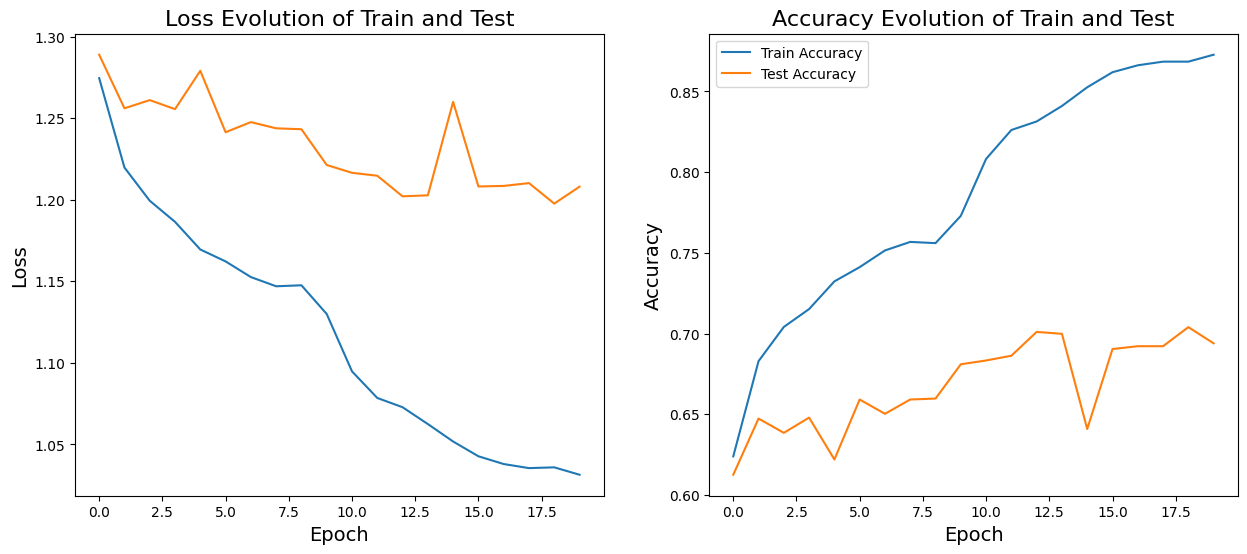

In [71]:
visualize_training_results(vgg_finetuned)

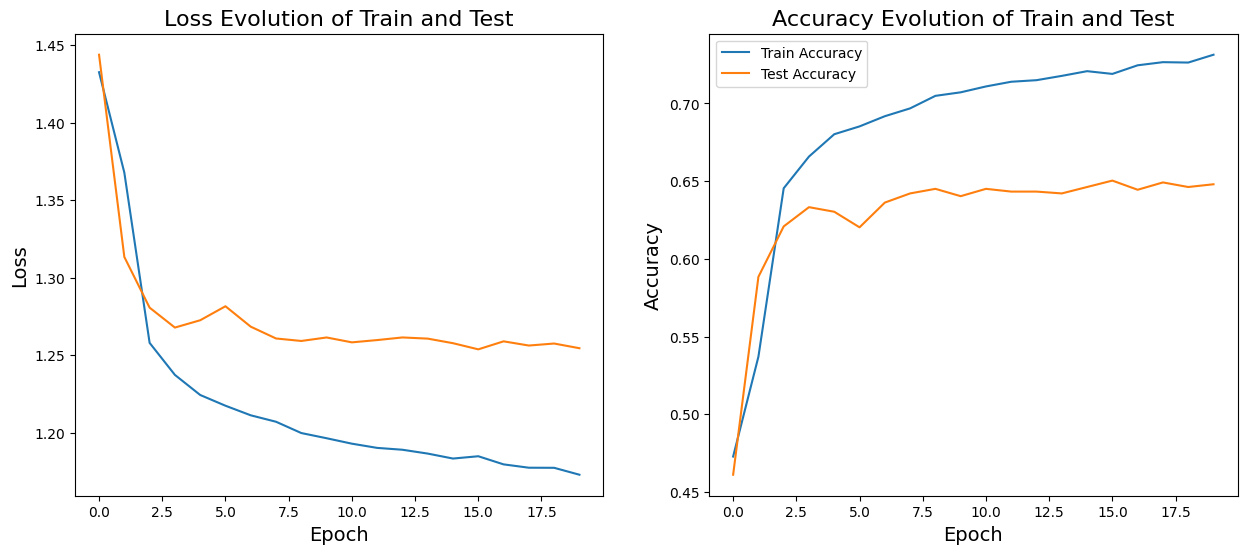

In [72]:
visualize_training_results(vgg_frozen)

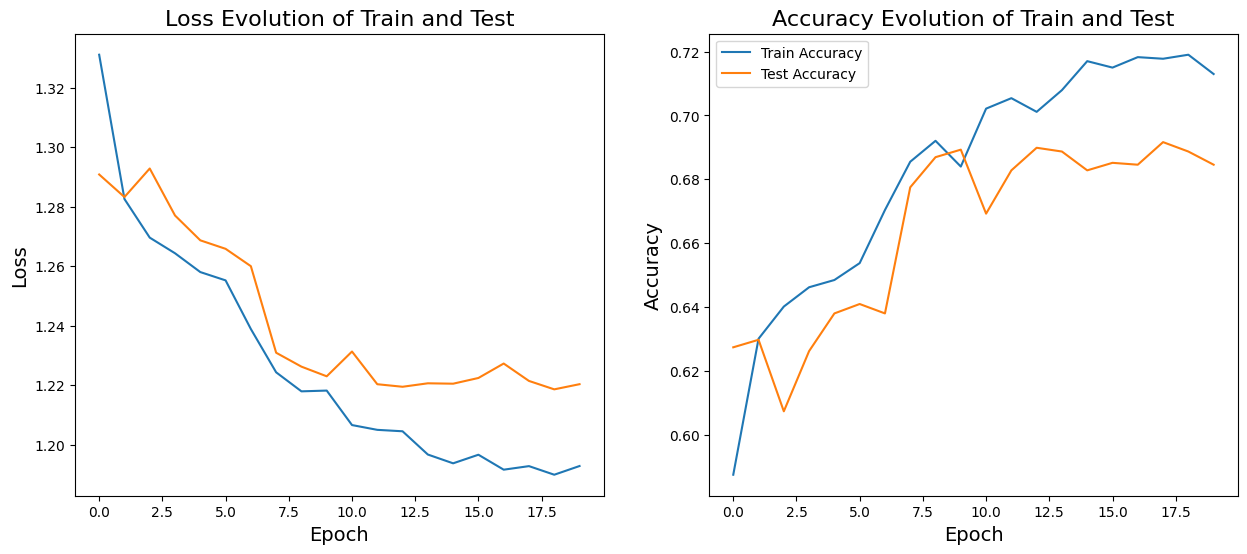

In [70]:
visualize_training_results(resnet_finetuned)

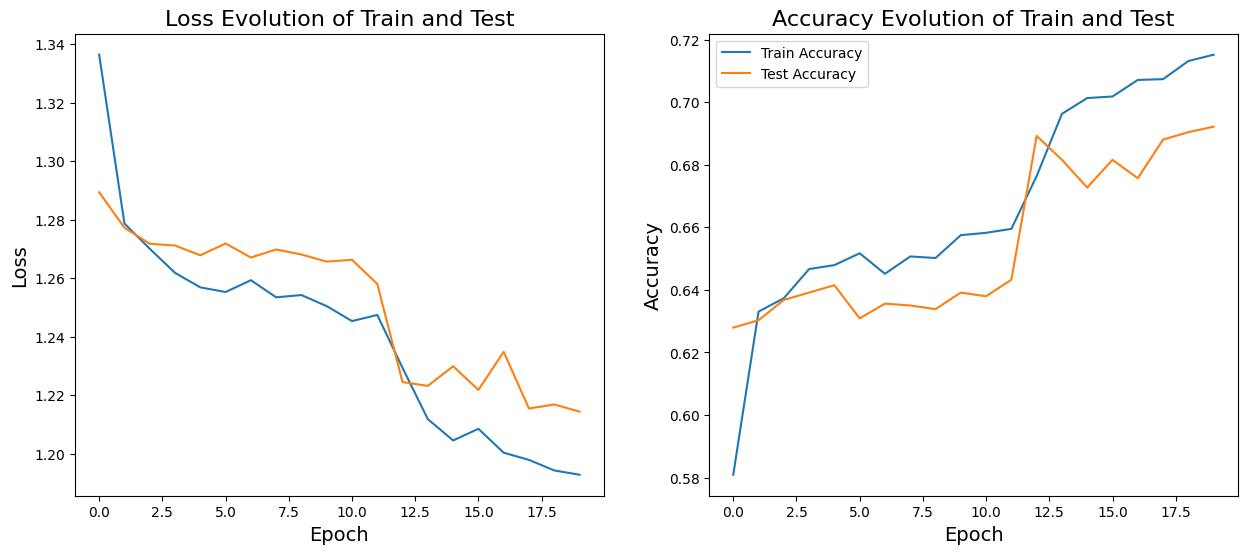

In [73]:
visualize_training_results(resnet_frozen)

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(TRAIN_ACCS, range(EPOCHS), label='Training Accuracy')
plt.plot(TRAIN_ACCS, range(EPOCHS), label='Test Accuracy')

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

plt.title('Evolution of Train and Test Accuracies', fontsize=16)

plt.legend()
plt.grid()

plt.show(); plt.close("all")

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report

In [ ]:
def test_model_1(model, data_,):
    train_dl, test_dl = data_

    train_predictions = [
        (y_train.cpu().numpy().reshape(-1, 1), model(X_train.to(DEVICE)).detach().cpu().numpy().reshape(-1, 1))
        for X_train, y_train in iter(train_dl)
    ]
    test_predictions = [
        (y_test.cpu().numpy().reshape(-1, 1), model(X_test.to(DEVICE)).detach().cpu().numpy().reshape(-1, 1))
        for X_test, y_test in iter(test_dl)
    ]

    train_ys = np.concatenate([a for a, b in train_predictions], axis = 0)
    train_preds = np.concatenate([b for a, b in train_predictions], axis = 0)

    train_score = roc_auc_score(train_ys, train_preds, multi_class = "ovo")

    test_ys = np.concatenate([a for a, b in test_predictions], axis = 0)
    test_preds = np.concatenate([b for a, b in test_predictions], axis = 0)

    test_score = roc_auc_score(test_ys, test_preds, multi_class = "ovo")
    # ### Train ROC AUC
    # train_score = [
    #     roc_auc_score(y_train.cpu().numpy().squeeze(), model(X_train.to(DEVICE)).detach().cpu().numpy(), multi_class = "ovr")
    #     for X_train, y_train in iter(train_dl)
    # ]
    # ### Test ROC AUC
    # test_score = [
    #     roc_auc_score(y_test.cpu().numpy().squeeze(), model(X_test.to(DEVICE)).detach().cpu().numpy(), multi_class = "ovr")
    #     for X_test, y_test in iter(test_dl)
    # ]

    # train_score = sum(train_score) / len(train_score)
    # test_score = sum(test_score) / len(test_score)

    return pd.DataFrame(
        data = {
            "Train": [100 * train_score],
            "Test": [100 * test_score],
            "Error (%)": [100 * (train_score - test_score)]
        }
    )

In [ ]:
def test_model_2(model, data_, score_function):
    train_dl, test_dl = data_

    ### Train score
    train_score = [
        score_function(y_train.cpu().numpy().squeeze(), model(X_train.to(DEVICE)).detach().cpu().numpy(),)
        for X_train, y_train in iter(train_dl)
    ]
    ### Test score
    test_score = [
        score_function(y_test.cpu().numpy().squeeze(), model(X_test.to(DEVICE)).detach().cpu().numpy(),)
        for X_test, y_test in iter(test_dl)
    ]

    train_score = sum(train_score) / len(train_score)
    test_score = sum(test_score) / len(test_score)

    return pd.DataFrame(
        data = {
            "Train": [100 * train_score],
            "Test": [100 * test_score],
            "Error (%)": [100 * (train_score - test_score)]
        }
    )

In [ ]:
# Accumulate data for testing
data_ = [
    train_dl,
    test_dl
]

In [ ]:
test_model_2(model = model, data_ = data_)

#### Observation

In order to combat label imbalance, pretrained models were leveraged. These models were utilized both as feature extractors and as finetuned blocks. The results observed were as follows:

1. No serious difference in performance was observed when using the pretrained __Resnet-18__ model as feature extractor (with frozen weights) or as a finetuned block.

2. The pretrained __VGG-13__ model showed good performance when finetuned, but was prone to overfitting.

3. The image sizes had considerable impact on model speed and performance. Training with a size of _600 x 600_ gave a slower, lesser-performing model than with a size of _224 x 224_.

### Model Selection

Following on the observations above, the Resnet models may be selected over the VGG-13 models. Reasons for this choice are:
1. Model Size: Resnet-18 is much smaller than VGG-13. This means both training and inference would be faster.
2. Consistency: As can be seen by the visualizations above, and since it has a smaller generalization error, the Resnet-18 model is more consistent than the VGG-13 model.

In [76]:
# !mkdir artefacts
# !mkdir artefacts/models

In [77]:
selected_model = resnet_finetuned["model"]

In [78]:
for param in selected_model.parameters():
    param.requires_grad_(False)

In [79]:
scripted_model = torch.jit.script(selected_model)
scripted_model.save("./artefacts/models/scripted_model.ptt")

In [80]:
dummy_input = torch.randn(1, 3, 224, 224).to(DEVICE) #BATCH_SIZE, NUM_CHANNELS, IMG_HEIGHT, IMG_WIDTH
traced_model = torch.jit.trace(selected_model, dummy_input)
traced_model.save("./artefacts/models/traced_model.ptt")

### Model Deployment

This will make use of ONNX (Open Neural Network Exchange)

In [53]:
# Deploy using ONNX

In [57]:
model = resnet_finetuned['model']  # ORIGINAL nn.Module
# model.eval()

In [71]:
p = next(model.parameters())
p.device.type == "cuda"

True

In [ ]:
# Export model for device (Defaulting to CPU for ONNX)
model = model.cpu()

In [74]:
p.device.type == "cuda"

False

In [73]:
dummy_input = torch.randn(1, 3, 224, 224)
with torch.no_grad():
    torch.onnx.export(
        model,
        dummy_input,
        "./artefacts/models/model.onnx",
        opset_version=18,
        input_names=["input"],
        output_names=["output"],
        do_constant_folding=True
    )

[torch.onnx] Obtain model graph for `Model([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `Model([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅
Applied 40 of general pattern rewrite rules.
